# Vacancies_analysis: анализ тенденций на рынке труда трёх городов России

**Описание**:

Наш проект представляет собой анализ тенденций на рынке труда трёх городов России. Для проведения анализа мы парсим базу данных сайта hh.ru, нам необходимо извлечь названия вакансий и требования к ним по каждому городу.

Цель проекта: проанализировать, вакансии в каких сферах являются наиболее востребованными, какие профессии являются наиболее востребованными в трех городах России, разных по числу населения (города: Санкт-Петербург, Челябинск, Тольятти) за последний месяц. Помимо этого мы хотим сравнивнить заработные платы, требуемый опыт работы и режим работы, которые соответствуют вакансиям, и выявить закономерности и различия в показателях по каждому городу, а также понять, с чем могут быть связаны выяленные закономерности, какие профессии необходимы в том или ином городе и почему, какие условия и требования предлагают работодатели в разных городах и с чем это может быть связано. Мы собираем данные примерно о 500 вакансиях по каждому городу, сравниваем среднюю заработную плату по каждому городу, сравниваем взаимосвязи между сферами и требованиями по каждой вакансии (соотношение сфер и требуемого опыта работы, какой режим работы распространен для той или иной сферы и т.д.)

In [1]:
# Импорты модулей проекта

import json
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
import time
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Загрузка данных

Для парсинга сайта hh.ru мы использовали Selenium. Selenium подходит для парсинга динамических сайтов, в том числе hh.ru. После сбора вакансий по каждому городу данные сохраняются в JSON файл.

In [2]:
#Сбор данных по Санкт-Петербургу
driver = webdriver.Chrome()

#URL для Санкт-Петербурга
base_url_chel = "https://spb.hh.ru/search/vacancy?order_by=publication_time&enable_snippets=false&area=2&search_field=description&search_field=name&search_field=company_name&work_format=ON_SITE&work_format=REMOTE&text="
all_vacancies_data = []

# Перебираем страницы
for page_num in range(10):
    url = base_url_chel + str(page_num)

    driver.get(url)
    time.sleep(2)

    vacancies = driver.find_elements(By.CSS_SELECTOR, ".magritte-redesign")  # Главный блок вакансии

    for vacancy in vacancies:
        # Парсинг названия вакансии
        try:
            title = vacancy.find_element(By.CSS_SELECTOR, ".bloko-header-section-2").text

            # Парсинг зарплаты
            try:
                salary = vacancy.find_element(By.CSS_SELECTOR,
                                              "span.magritte-text___pbpft_3-0-33.magritte-text_style-primary___AQ7MW_3-0-33.magritte-text_typography-label-1-regular___pi3R-_3-0-33").text.replace(
                    "&nbsp;", " ")
            except NoSuchElementException:
                salary = "Не указана"

            # Парсинг опыта работы
            try:
                experience = vacancy.find_element(By.CSS_SELECTOR,"span[data-qa^='vacancy-serp__vacancy-work-experience']").text.replace("&nbsp;", " ")
            except NoSuchElementException:
                experience = "Не указан"

            # Парсинг графика работы
            try:
                work_format = vacancy.find_element(By.CSS_SELECTOR, "span[data-qa^='vacancy-label-work-schedule']").text.replace("&nbsp;", " ")
            except NoSuchElementException:
                work_format = "На месте работодателя"


            vacancy_data = {
                "title": title,
                "salary": salary,
                "experience": experience,
                "work_format": work_format

            }
            all_vacancies_data.append(vacancy_data)
        except Exception as e:
            print(f"Ошибка парсинга вакансии: {e}")
            continue

# Закрываем браузер
driver.quit()

# Сохраняем данные в JSON файл
with open('vacancies_spb.json', 'w', encoding='utf-8') as f:
    json.dump(all_vacancies_data, f, ensure_ascii=False, indent=2)

print(f"Собрано {len(all_vacancies_data)} вакансий. Данные сохранены в vacancies_spb.json")


Собрано 527 вакансий. Данные сохранены в vacancies_spb.json


In [3]:
#Сбор данных по Челябинску
driver = webdriver.Chrome()

# URL для Челябинска
base_url_chel = "https://chelyabinsk.hh.ru/search/vacancy?order_by=publication_time&search_period=30&items_on_page=100&L_save_area=true&hhtmFrom=vacancy_search_filter&enable_snippets=false&area=104&search_field=name&search_field=company_name&search_field=description&work_format=ON_SITE&work_format=REMOTE&text="
all_vacancies_data = []

# Перебираем страницы
for page_num in range(5):
    url = base_url_chel + str(page_num)

    driver.get(url)
    time.sleep(2)

    vacancies = driver.find_elements(By.CSS_SELECTOR, ".magritte-redesign")  # Главный блок вакансии

    for vacancy in vacancies:
        # Парсинг названия вакансии
        try:
            title = vacancy.find_element(By.CSS_SELECTOR, ".bloko-header-section-2").text

            # Парсинг зарплаты
            try:
                salary = vacancy.find_element(By.CSS_SELECTOR,
                                              "span.magritte-text___pbpft_3-0-33.magritte-text_style-primary___AQ7MW_3-0-33.magritte-text_typography-label-1-regular___pi3R-_3-0-33").text.replace(
                    "&nbsp;", " ")
            except NoSuchElementException:
                salary = "Не указана"

            # Парсинг опыта работы
            try:
                experience = vacancy.find_element(By.CSS_SELECTOR,"span[data-qa^='vacancy-serp__vacancy-work-experience']").text.replace("&nbsp;", " ")
            except NoSuchElementException:
                experience = "Не указан"

            # Парсинг графика работы
            try:
                work_format = vacancy.find_element(By.CSS_SELECTOR, "span[data-qa^='vacancy-label-work-schedule']").text.replace("&nbsp;", " ")
            except NoSuchElementException:
                work_format = "На месте работодателя"


            vacancy_data = {
                "title": title,
                "salary": salary,
                "experience": experience,
                "work_format": work_format

            }
            all_vacancies_data.append(vacancy_data)
        except Exception as e:
            print(f"Ошибка парсинга вакансии: {e}")
            continue

# Закрываем браузер
driver.quit()

# Сохраняем данные в JSON файл
with open('vacancies_chel.json', 'w', encoding='utf-8') as f:
    json.dump(all_vacancies_data, f, ensure_ascii=False, indent=2)

print(f"Собрано {len(all_vacancies_data)} вакансий. Данные сохранены в vacancies_chel.json")

Собрано 514 вакансий. Данные сохранены в vacancies_chel.json


In [4]:
#Сбор данных по Тольятти
driver = webdriver.Chrome()

# URL для Тольятти
base_url_chel = " https://togliatti.hh.ru/search/vacancy?order_by=publication_time&search_period=30&items_on_page=100&L_save_area=true&hhtmFrom=vacancy_search_filter&enable_snippets=false&area=212&search_field=name&search_field=company_name&search_field=description&work_format=ON_SITE&work_format=REMOTE&text="
all_vacancies_data = []

# Перебираем страницы
for page_num in range(5):
    url = base_url_chel + str(page_num)

    driver.get(url)
    time.sleep(2)

    vacancies = driver.find_elements(By.CSS_SELECTOR, ".magritte-redesign")  # Главный блок вакансии

    for vacancy in vacancies:
        # Парсинг названия вакансии
        try:
            title = vacancy.find_element(By.CSS_SELECTOR, ".bloko-header-section-2").text

            # Парсинг зарплаты
            try:
                salary = vacancy.find_element(By.CSS_SELECTOR,
                                              "span.magritte-text___pbpft_3-0-33.magritte-text_style-primary___AQ7MW_3-0-33.magritte-text_typography-label-1-regular___pi3R-_3-0-33").text.replace(
                    "&nbsp;", " ")
            except NoSuchElementException:
                salary = "Не указана"

            # Парсинг опыта работы
            try:
                experience = vacancy.find_element(By.CSS_SELECTOR,"span[data-qa^='vacancy-serp__vacancy-work-experience']").text.replace("&nbsp;", " ")
            except NoSuchElementException:
                experience = "Не указан"

            # Парсинг графика работы
            try:
                work_format = vacancy.find_element(By.CSS_SELECTOR, "span[data-qa^='vacancy-label-work-schedule']").text.replace("&nbsp;", " ")
            except NoSuchElementException:
                work_format = "На месте работодателя"


            vacancy_data = {
                "title": title,
                "salary": salary,
                "experience": experience,
                "work_format": work_format

            }
            all_vacancies_data.append(vacancy_data)
        except Exception as e:
            print(f"Ошибка парсинга вакансии: {e}")
            continue

# Закрываем браузер
driver.quit()

# Сохраняем данные в JSON файл
with open('vacancies_tol.json', 'w', encoding='utf-8') as f:
    json.dump(all_vacancies_data, f, ensure_ascii=False, indent=2)

print(f"Собрано {len(all_vacancies_data)} вакансий. Данные сохранены в vacancies_tol.json")

Собрано 505 вакансий. Данные сохранены в vacancies_tol.json


## Очистка данных и подготовка к анализу

На данном этапе мы приводим данные к формату датафрейма и проводим разведочный анализ (EDA).

По каждому городу у нас есть следующие колонки:
- **title: Название** - это название каждой вакансии.
- **salary: Зарплата** - соответствующая каждой вакансии заработная плата.
- **experience: Опыт** - необходимый опыт, который требуется для данной вакансии.
- **work_format: Режим работы** - режим работы для каждой вакансии.
- **Категория** - в этой колонке мы выделяем категорию для каждой вакансии по ключевым словам. Выделение сферы для вакансий поможет нам при анализе.

Так как сайт динамический, каждый раз вакансии парсятся по-разному, поэтому конкретные примеры привести можно только после запуска кода. Поэтому это общее описание процесса по очистке и первичному анализу собранных данных.

Сначала мы проводим очистку. Мы удаляем пропущенные значения, а в тех столбцах, где написано “не указано”, мы заменяем данные на Na и тоже удаляем. Также в столбце с заработной платой мы чистим значения, которые были указаны в долларах или евро, так как мы сравниваем зарплату только в рублях. До и после очистки данных в выводе после выполнения кода указано, сколько переменных было и сколько осталось.
Зарплата изначально парсится в текстовом формате и частично представлена в диапазонах. Но нам необходимо сравнить этот показатель, поэтому разделяем зарплату с диапазонами на два столбца: min_salary и max_salary и переводим в числовой формат.
Так как мы решили сравнивать среднюю заработную плату по городам, то мы добавляем ещё один столбец в числовом формате со средней зарплатой (min_salary+max_salary)/2 по городам (см. раздел визуализации).

Таким образом, у нас остается 5 переменных с типом “object” и 2 переменных с типом “float” (минимальная и максимальная зарплата), всего переменных 7. После у нас добавится ещё одна числовая переменная avg_salary со средней заработной платой.

По переменным min и max salary возможно провести описательную статистику, так как они находятся в числовом формате. Характеристики при описании:
- Количество (count): количество наблюдений.
- Среднее (mean): средняя минимальная зарплата и средняя максимальная. Это дает общее представление об уровне зарплат.
- Стандартное отклонение (std):  стандартное отклонение для минимальной или максимальной зарплаты  указывает на разброс зарплат вокруг среднего значения.
- Минимум (min): минимальная предлагаемая зарплата
- Максимум (max): Максимальная предлагаемая зарплата
- Квартили (25%, 50%, 75%)
Мы не можем привести конкретные значения, так как сайт динамический и парсятся различные вакансии.


При выводе будут видны уникальные значения столбца “title”, а также наиболее частые значения в столбцах “title”, “experience”, “work_format”.

**EDA и очистка данных для Санкт-Петербурга:**

In [5]:
# Преобразовываем JSON файл в датафрейм
with open('vacancies_spb.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)[['title', 'salary', 'experience', 'work_format']]

# Переводим названия колонок на русский язык
df = df.rename(columns={
    'title': 'Название',
    'salary': 'Зарплата',
    'experience': 'Опыт',
    'work_format': 'Режим работы'})

# Составляем список ключевых слов для категорий
service_keywords = ['повар', 'бариста', 'официант', 'ресторан', 'кафе', 'уборщик', 'уборщица', 'пекарь', 'пекарня', 'горничная', 'бармен']
it_keywords = ['программист', 'аналитик', 'разработчик', 'analyst', 'developer', 'гейм', 'game', "Python", 'C++', 'JavaScript', "C#", 'Java', 'IT']
management_keywors = ['менеджер', 'администратор', 'управляющий']
sales_keywords = ['продаж', 'кассир', 'продавец-кассир', 'продавец-консультант', 'продавец', 'sales', "товаровед", "закупк", "кладовщик", "директор магазина"]
med_keywors = ['психолог', 'психиатр', 'терапевт', 'окулист', 'врач', 'фармацевт', 'стоматолог', 'лаборант', 'рентгенолаборант', 'аптека', 'сиделка', 'массажист', "санитар", "медицинская сестра", "медицинский брат", "медсестра", "медбрат", "косметолог"]
ship_keywords = ['WB', 'OZON', 'Яндекс Маркет', 'доставка', 'заказ', 'ВБ', 'Озон', 'доставщик', 'логист', 'склад', 'курьер']
finance_keywords = ['финанс', 'бухгалтер', "инвест", "экономист"]
call_keywords = ['call', 'оператор', 'чат', 'клиент', 'поддержка']
market_keywords = ['маркет', 'маркетолог', 'реклам']
auto_keywords = ['водитель', 'грузчик', 'автомеханик', 'автослесарь', "автоэлектрик", "автомобил", "мойщик"]
industr_keywords = ['инженер', 'электромонтажник', 'разнорабочий', 'энергетик', 'техник', 'слесар', 'фрезеровщик', "склейщик", "прораб", "технический специалист", "мастер по ремонту", "токарь"]
jur_keywords = ["юрист", "юрисконсульт", "адвокат", "документооборот"]
teach_keywords = ["учитель", "преподаватель", "репетитор"]
housing_keywords = ["агент по недвижимости", "риелтор"]

# Создаем колонку "Категория"
def categorize(title):
    title_lower = title.lower()  # для регистронезависимости
    if any(word in title_lower for word in service_keywords):
        return 'Сфера обслуживания'
    elif any(word in title_lower for word in it_keywords):
        return 'IT'
    elif any(word in title_lower for word in management_keywors):
        return 'Менеджмент'
    elif any(word in title_lower for word in sales_keywords):
        return 'Продажи'
    elif any(word in title_lower for word in med_keywors):
        return 'Медицина'
    elif any(word in title_lower for word in ship_keywords):
        return 'Сфера доставки'
    elif any(word in title_lower for word in finance_keywords):
        return 'Финансы/бухгалтерия'
    elif any(word in title_lower for word in call_keywords):
        return 'Поддержка клиентов'
    elif any(word in title_lower for word in market_keywords):
        return 'Маркетинг и реклама'
    elif any(word in title_lower for word in auto_keywords):
        return 'Автомобильная сфера'
    elif any(word in title_lower for word in industr_keywords):
        return 'Промышленность'
    elif any(word in title_lower for word in jur_keywords):
        return 'Юриспруденция'
    elif any(word in title_lower for word in teach_keywords):
        return 'Педагогика и преподавание'
    elif any(word in title_lower for word in housing_keywords):
        return 'Недвижимость'
    else:
        return 'Другое'

df['Категория'] = df['Название'].apply(categorize)


# Преобразование типов данных и очистка(и EDA)

# Заменяем текстовые обозначения пропусков в нужных столбцах
df['Зарплата'] = df['Зарплата'].replace(["Не указана", "Не указан", ""], pd.NA)
df['Опыт'] = df['Опыт'].replace(["Не указана", "Не указан", ""], pd.NA)

print("\nКоличество пропусков до очистки:")
print(df.isnull().sum())

# Удаляем строки, где есть пропуски в salary или experience
df.dropna(subset=['Зарплата', 'Опыт'], how='any', inplace=True)

def extract_salary_range(salary_str):
    """
    Извлекает диапазон зарплат из строки и возвращает его в числовом формате (min, max).
    Если строка содержит только одно число, то min и max зарплаты равны этому числу.
    Если строка не содержит ни диапазон, ни одно число, возвращает None.
    """
    if pd.isna(salary_str):
        return None, None

    salary_str = str(salary_str).lower().strip()

    # Определяем валюту (убираем доллары и евро)
    if '$' in salary_str :
        return None, None
    if '€' in salary_str :
        return None, None

    # Удаляем все нецифровые символы, кроме точек, запятых и разделителей диапазона
    cleaned_str = re.sub(r'[^\d.,–\-—\s]', '', salary_str)

    # Заменяем запятые на точки (для десятичных разделителей)
    cleaned_str = cleaned_str.replace(',', '.')

    # Заменяем все пробелы (включая неразрывные) и другие разделители тысяч
    cleaned_str = re.sub(r'[\s\xa0]', '', cleaned_str)

    # Исправленное регулярное выражение (добавлена закрывающая скобка)
    match_range = re.search(r'(\d+(?:\.\d+)?)[–\-—](\d+(?:\.\d+)?)', cleaned_str)
    if match_range:
        try:
            min_salary = float(match_range.group(1))
            max_salary = float(match_range.group(2))
            return min_salary, max_salary
        except ValueError:
            pass

    # Если нет диапазона, ищем одиночное число
    match_single = re.search(r'(\d+(?:\.\d+)?)', cleaned_str)
    if match_single:
        try:
            salary = float(match_single.group(1))
            return salary, salary
        except ValueError:
            pass

    return None, None


# Применяем функцию к столбцу salary и создаем новые столбцы
df[['min_salary', 'max_salary']] = df['Зарплата'].apply(lambda x: pd.Series(extract_salary_range(x)))

# Фильтрация
df = df[df['max_salary'] >= 1000]
df = df[df['min_salary'] > 0]

print("\nКоличество пропусков до очистки:")
print(df.isnull().sum())

# Удаляем строки, где не удалось извлечь какую-либо зарплату
df.dropna(subset=['min_salary', 'max_salary'], how='any', inplace=True)

# Обработка аномалий
# Инверсия min и max, если max < min
mask = df['max_salary'] < df['min_salary']
df.loc[mask, ['min_salary', 'max_salary']] = df.loc[mask, ['max_salary', 'min_salary']].values

# Выводим несколько первых строк
print("Первые строки:")
print(df.head())

# Проверяем результат
print("\nСтатистика после очистки:")
print(f"Осталось строк: {len(df)}")
print("\nКоличество пропусков:")
print(df.isnull().sum())

# 5. Минимальный EDA для всех переменных
print("Описание типов переменных:\n", df.dtypes)
print("\nОписательные статистики:\n", df.describe())
low_salaries = df[df['min_salary'] == 300]
print(low_salaries[['Зарплата', 'min_salary', 'max_salary']])
print("\nУникальные значения в столбце 'title':\n", df['Название'].unique())
print("\nНаиболее частые значения в столбце 'title':\n", df['Название'].value_counts())
print("\nНаиболее частые значения в столбце 'experience':\n", df['Опыт'].value_counts())
print("\nНаиболее частые значения в столбце 'work_format':\n", df['Режим работы'].value_counts())

df.to_csv('vacancies_spb.csv', index=False, encoding='utf-8')


Количество пропусков до очистки:
Название         0
Зарплата        19
Опыт             0
Режим работы     0
Категория        0
dtype: int64

Количество пропусков до очистки:
Название        0
Зарплата        0
Опыт            0
Режим работы    0
Категория       0
min_salary      0
max_salary      0
dtype: int64
Первые строки:
                                            Название  \
0  Менеджер по продажам дорожно-строительной техники   
1  Менеджер по продажам дорожно-строительной техники   
2                                              Повар   
3                                  Главный бухгалтер   
4                               Оператор call-центра   

                                  Зарплата           Опыт  \
0           от 200 000 ₽ за месяц, на руки  Опыт 1-3 года   
1           от 200 000 ₽ за месяц, на руки  Опыт 1-3 года   
2            от 90 000 ₽ за месяц, на руки      Без опыта   
3           от 100 000 ₽ за месяц, на руки   Опыт 3-6 лет   
4  от 68 000 ₽ за месяц, до 

**EDA и очистка данных для Челябинска:**

In [6]:
# Преобразовываем JSON файл в датафрейм
with open('vacancies_chel.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)[['title', 'salary', 'experience', 'work_format']]

# Переводим названия колонок на русский язык
df = df.rename(columns={
    'title': 'Название',
    'salary': 'Зарплата',
    'experience': 'Опыт',
    'work_format': 'Режим работы'})

# Составляем список ключевых слов для категорий
service_keywords = ['повар', 'бариста', 'официант', 'ресторан', 'кафе', 'уборщик', 'уборщица', 'пекарь', 'пекарня', 'горничная', 'бармен']
it_keywords = ['программист', 'аналитик', 'разработчик', 'analyst', 'developer', 'гейм', 'game', "Python", 'C++', 'JavaScript', "C#", 'Java', 'IT']
management_keywors = ['менеджер', 'администратор', 'управляющий']
sales_keywords = ['продаж', 'кассир', 'продавец-кассир', 'продавец-консультант', 'продавец', 'sales', "товаровед", "закупк", "кладовщик", "директор магазина"]
med_keywors = ['психолог', 'психиатр', 'терапевт', 'окулист', 'врач', 'фармацевт', 'стоматолог', 'лаборант', 'рентгенолаборант', 'аптека',
               'сиделка', 'массажист', "санитар", "медицинская сестра", "медицинский брат", "медсестра", "медбрат", "косметолог"]
ship_keywords = ['WB', 'OZON', 'Яндекс Маркет', 'доставка', 'заказ', 'ВБ', 'Озон', 'доставщик', 'логист', 'склад', 'курьер']
finance_keywords = ['финанс', 'бухгалтер', "инвест", "экономист"]
call_keywords = ['call', 'оператор', 'чат', 'клиент', 'поддержка']
market_keywords = ['маркет', 'маркетолог', 'реклам']
auto_keywords = ['водитель', 'грузчик', 'автомеханик', 'автослесарь', "автоэлектрик", "автомобил", "мойщик"]
industr_keywords = ['инженер', 'электромонтажник', 'разнорабочий', 'энергетик', 'техник', 'слесар', 'фрезеровщик', "склейщик", "прораб", "технический специалист", "мастер по ремонту", "токарь"]
jur_keywords = ["юрист", "юрисконсульт", "адвокат", "документооборот"]
teach_keywords = ["учитель", "преподаватель", "репетитор"]
housing_keywords = ["агент по недвижимости", "риелтор"]

# Создаем колонку "Категория"
def categorize(title):
    title_lower = title.lower()  # для регистронезависимости
    if any(word in title_lower for word in service_keywords):
        return 'Сфера обслуживания'
    elif any(word in title_lower for word in it_keywords):
        return 'IT'
    elif any(word in title_lower for word in management_keywors):
        return 'Менеджмент'
    elif any(word in title_lower for word in sales_keywords):
        return 'Продажи'
    elif any(word in title_lower for word in med_keywors):
        return 'Медицина'
    elif any(word in title_lower for word in ship_keywords):
        return 'Сфера доставки'
    elif any(word in title_lower for word in finance_keywords):
        return 'Финансы/бухгалтерия'
    elif any(word in title_lower for word in call_keywords):
        return 'Поддержка клиентов'
    elif any(word in title_lower for word in market_keywords):
        return 'Маркетинг и реклама'
    elif any(word in title_lower for word in auto_keywords):
        return 'Автомобильная сфера'
    elif any(word in title_lower for word in industr_keywords):
        return 'Промышленность'
    elif any(word in title_lower for word in jur_keywords):
        return 'Юриспруденция'
    elif any(word in title_lower for word in teach_keywords):
        return 'Педагогика и преподавание'
    elif any(word in title_lower for word in housing_keywords):
        return 'Недвижимость'
    else:
        return 'Другое'

df['Категория'] = df['Название'].apply(categorize)

# Преобразование типов данных и очистка (и EDA)

# Заменяем текстовые обозначения пропусков в нужных столбцах
df['Зарплата'] = df['Зарплата'].replace(["Не указана", "Не указан", ""], pd.NA)
df['Опыт'] = df['Опыт'].replace(["Не указана", "Не указан", ""], pd.NA)

print("\nКоличество пропусков до очистки:")
print(df.isnull().sum())

# Удаляем строки, где есть пропуски в salary или experience
df.dropna(subset=['Зарплата', 'Опыт'], how='any', inplace=True)

def extract_salary_range(salary_str):
    """
    Извлекает диапазон зарплат из строки и возвращает его в числовом формате (min, max).
    Если строка содержит только одно число, то min и max зарплаты равны этому числу.
    Если строка не содержит ни диапазон, ни одно число, возвращает None.
    """
    if pd.isna(salary_str):
        return None, None

    salary_str = str(salary_str).lower().strip()

    # Определяем валюту (убираем доллары и евро)
    if '$' in salary_str :
        return None, None
    if '€' in salary_str :
        return None, None

    # Удаляем все нецифровые символы, кроме точек, запятых и разделителей диапазона
    cleaned_str = re.sub(r'[^\d.,–\-—\s]', '', salary_str)

    # Заменяем запятые на точки (для десятичных разделителей)
    cleaned_str = cleaned_str.replace(',', '.')

    # Заменяем все пробелы (включая неразрывные) и другие разделители тысяч
    cleaned_str = re.sub(r'[\s\xa0]', '', cleaned_str)

    # Исправленное регулярное выражение (добавлена закрывающая скобка)
    match_range = re.search(r'(\d+(?:\.\d+)?)[–\-—](\d+(?:\.\d+)?)', cleaned_str)
    if match_range:
        try:
            min_salary = float(match_range.group(1))
            max_salary = float(match_range.group(2))
            return min_salary, max_salary
        except ValueError:
            pass

    # Если нет диапазона, ищем одиночное число
    match_single = re.search(r'(\d+(?:\.\d+)?)', cleaned_str)
    if match_single:
        try:
            salary = float(match_single.group(1))
            return salary, salary
        except ValueError:
            pass

    return None, None


# Применяем функцию к столбцу salary и создаем новые столбцы
df[['min_salary', 'max_salary']] = df['Зарплата'].apply(lambda x: pd.Series(extract_salary_range(x)))

# Фильтрация
df = df[df['max_salary'] >= 1000]
df = df[df['min_salary'] > 0]

print("\nКоличество пропусков до очистки:")
print(df.isnull().sum())

# Удаляем строки, где не удалось извлечь какую-либо зарплату
df.dropna(subset=['min_salary', 'max_salary'], how='any', inplace=True)


# Обработка аномалий
# Инверсия min и max, если max < min
mask = df['max_salary'] < df['min_salary']
df.loc[mask, ['min_salary', 'max_salary']] = df.loc[mask, ['max_salary', 'min_salary']].values

# Выводим несколько первых строк
print("Первые строки:")
print(df.head())

# Проверяем результат
print("\nСтатистика после очистки:")
print(f"Осталось строк: {len(df)}")
print("\nКоличество пропусков:")
print(df.isnull().sum())

# 5. Минимальный EDA для всех переменных
print("Описание типов переменных:\n", df.dtypes)
print("\nОписательные статистики:\n", df.describe())
low_salaries = df[df['min_salary'] == 300]
print(low_salaries[['Зарплата', 'min_salary', 'max_salary']])
print("\nУникальные значения в столбце 'title':\n", df['Название'].unique())
print("\nНаиболее частые значения в столбце 'title':\n", df['Название'].value_counts())
print("\nНаиболее частые значения в столбце 'experience':\n", df['Опыт'].value_counts())
print("\nНаиболее частые значения в столбце 'work_format':\n", df['Режим работы'].value_counts())

df.to_csv('vacancies_chel.csv', index=False, encoding='utf-8')


Количество пропусков до очистки:
Название         0
Зарплата        36
Опыт             0
Режим работы     0
Категория        0
dtype: int64

Количество пропусков до очистки:
Название        0
Зарплата        0
Опыт            0
Режим работы    0
Категория       0
min_salary      0
max_salary      0
dtype: int64
Первые строки:
                        Название                                 Зарплата  \
0                    Оператор 1С            от 50 000 ₽ за месяц, на руки   
1                    Оператор 1С            от 50 000 ₽ за месяц, на руки   
2                         Бармен      45 000 – 60 000 ₽ за месяц, на руки   
3           Оператор call-центра  от 68 000 ₽ за месяц, до вычета налогов   
4  Продавец-консультант трк Куба            от 48 000 ₽ за месяц, на руки   

            Опыт           Режим работы           Категория  min_salary  \
0  Опыт 1-3 года         Можно удалённо  Поддержка клиентов     50000.0   
1  Опыт 1-3 года  На месте работодателя  Поддержка клиент

**EDA и очистка данных для Тольятти:**

In [7]:
# Преобразовываем JSON файл в датафрейм
with open('vacancies_tol.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data)[['title', 'salary', 'experience', 'work_format']]

# Переводим названия колонок на русский язык
df = df.rename(columns={
    'title': 'Название',
    'salary': 'Зарплата',
    'experience': 'Опыт',
    'work_format': 'Режим работы'})

# Составляем список ключевых слов для категорий
service_keywords = ['повар', 'бариста', 'официант', 'ресторан', 'кафе', 'уборщик', 'уборщица', 'пекарь', 'пекарня', 'горничная', 'бармен']
it_keywords = ['программист', 'аналитик', 'разработчик', 'analyst', 'developer', 'гейм', 'game', "Python", 'C++', 'JavaScript', "C#", 'Java', 'IT']
management_keywors = ['менеджер', 'администратор', 'управляющий']
sales_keywords = ['продаж', 'кассир', 'продавец-кассир', 'продавец-консультант', 'продавец', 'sales', "товаровед", "закупк", "кладовщик", "директор магазина"]
med_keywors = ['психолог', 'психиатр', 'терапевт', 'окулист', 'врач', 'фармацевт', 'стоматолог', 'лаборант', 'рентгенолаборант', 'аптека', 'сиделка', 'массажист', "санитар", "медицинская сестра", "медицинский брат", "медсестра", "медбрат", "косметолог"]
ship_keywords = ['WB', 'OZON', 'Яндекс Маркет', 'доставка', 'заказ', 'ВБ', 'Озон', 'доставщик', 'логист', 'склад', 'курьер']
finance_keywords = ['финанс', 'бухгалтер', "инвест", "экономист"]
call_keywords = ['call', 'оператор', 'чат', 'клиент', 'поддержка']
market_keywords = ['маркет', 'маркетолог', 'реклам']
auto_keywords = ['водитель', 'грузчик', 'автомеханик', 'автослесарь', "автоэлектрик", "автомобил", "мойщик"]
industr_keywords = ['инженер', 'электромонтажник', 'разнорабочий', 'энергетик', 'техник', 'слесар', 'фрезеровщик', "склейщик", "прораб", "технический специалист", "мастер по ремонту", "токарь"]
jur_keywords = ["юрист", "юрисконсульт", "адвокат", "документооборот"]
teach_keywords = ["учитель", "преподаватель", "репетитор"]
housing_keywords = ["агент по недвижимости", "риелтор"]

# Создаем колонку "Категория"
def categorize(title):
    title_lower = title.lower()  # для регистронезависимости
    if any(word in title_lower for word in service_keywords):
        return 'Сфера обслуживания'
    elif any(word in title_lower for word in it_keywords):
        return 'IT'
    elif any(word in title_lower for word in management_keywors):
        return 'Менеджмент'
    elif any(word in title_lower for word in sales_keywords):
        return 'Продажи'
    elif any(word in title_lower for word in med_keywors):
        return 'Медицина'
    elif any(word in title_lower for word in ship_keywords):
        return 'Сфера доставки'
    elif any(word in title_lower for word in finance_keywords):
        return 'Финансы/бухгалтерия'
    elif any(word in title_lower for word in call_keywords):
        return 'Поддержка клиентов'
    elif any(word in title_lower for word in market_keywords):
        return 'Маркетинг и реклама'
    elif any(word in title_lower for word in auto_keywords):
        return 'Автомобильная сфера'
    elif any(word in title_lower for word in industr_keywords):
        return 'Промышленность'
    elif any(word in title_lower for word in jur_keywords):
        return 'Юриспруденция'
    elif any(word in title_lower for word in teach_keywords):
        return 'Педагогика и преподавание'
    elif any(word in title_lower for word in housing_keywords):
        return 'Недвижимость'
    else:
        return 'Другое'

df['Категория'] = df['Название'].apply(categorize)


# Преобразование типов данных и очистка(и EDA)

# Заменяем текстовые обозначения пропусков в нужных столбцах
df['Зарплата'] = df['Зарплата'].replace(["Не указана", "Не указан", ""], pd.NA)
df['Опыт'] = df['Опыт'].replace(["Не указана", "Не указан", ""], pd.NA)

print("\nКоличество пропусков до очистки:")
print(df.isnull().sum())

# Удаляем строки, где есть пропуски в salary или experience
df.dropna(subset=['Зарплата', 'Опыт'], how='any', inplace=True)

def extract_salary_range(salary_str):
    """
    Извлекает диапазон зарплат из строки и возвращает его в числовом формате (min, max).
    Если строка содержит только одно число, то min и max зарплаты равны этому числу.
    Если строка не содержит ни диапазон, ни одно число, возвращает None.
    """
    if pd.isna(salary_str):
        return None, None

    salary_str = str(salary_str).lower().strip()

    # Определяем валюту (убираем доллары и евро)
    if '$' in salary_str :
        return None, None
    if '€' in salary_str :
        return None, None

    # Удаляем все нецифровые символы, кроме точек, запятых и разделителей диапазона
    cleaned_str = re.sub(r'[^\d.,–\-—\s]', '', salary_str)

    # Заменяем запятые на точки (для десятичных разделителей)
    cleaned_str = cleaned_str.replace(',', '.')

    # Заменяем все пробелы (включая неразрывные) и другие разделители тысяч
    cleaned_str = re.sub(r'[\s\xa0]', '', cleaned_str)

    # Исправленное регулярное выражение (добавлена закрывающая скобка)
    match_range = re.search(r'(\d+(?:\.\d+)?)[–\-—](\d+(?:\.\d+)?)', cleaned_str)
    if match_range:
        try:
            min_salary = float(match_range.group(1))
            max_salary = float(match_range.group(2))
            return min_salary, max_salary
        except ValueError:
            pass

    # Если нет диапазона, ищем одиночное число
    match_single = re.search(r'(\d+(?:\.\d+)?)', cleaned_str)
    if match_single:
        try:
            salary = float(match_single.group(1))
            return salary, salary
        except ValueError:
            pass

    return None, None


# Применяем функцию к столбцу salary и создаем новые столбцы
df[['min_salary', 'max_salary']] = df['Зарплата'].apply(lambda x: pd.Series(extract_salary_range(x)))

# Фильтрация
df = df[df['max_salary'] >= 1000]
df = df[df['min_salary'] > 0]

print("\nКоличество пропусков до очистки:")
print(df.isnull().sum())

# Удаляем строки, где не удалось извлечь какую-либо зарплату
df.dropna(subset=['min_salary', 'max_salary'], how='any', inplace=True)


# Обработка аномалий
# Инверсия min и max, если max < min
mask = df['max_salary'] < df['min_salary']
df.loc[mask, ['min_salary', 'max_salary']] = df.loc[mask, ['max_salary', 'min_salary']].values

# Выводим несколько первых строк
print("Первые строки:")
print(df.head())

# Проверяем результат
print("\nСтатистика после очистки:")
print(f"Осталось строк: {len(df)}")
print("\nКоличество пропусков:")
print(df.isnull().sum())

# 5. Минимальный EDA для всех переменных
print("Описание типов переменных:\n", df.dtypes)
print("\nОписательные статистики:\n", df.describe())
low_salaries = df[df['min_salary'] == 300]
print(low_salaries[['Зарплата', 'min_salary', 'max_salary']])
print("\nУникальные значения в столбце 'title':\n", df['Название'].unique())
print("\nНаиболее частые значения в столбце 'title':\n", df['Название'].value_counts())
print("\nНаиболее частые значения в столбце 'experience':\n", df['Опыт'].value_counts())
print("\nНаиболее частые значения в столбце 'work_format':\n", df['Режим работы'].value_counts())

df.to_csv('vacancies_tol.csv', index=False, encoding='utf-8')


Количество пропусков до очистки:
Название         0
Зарплата        98
Опыт             0
Режим работы     0
Категория        0
dtype: int64

Количество пропусков до очистки:
Название        0
Зарплата        0
Опыт            0
Режим работы    0
Категория       0
min_salary      0
max_salary      0
dtype: int64
Первые строки:
                                            Название  \
0  Электромонтер по обслуживанию и ремонту электр...   
1  Электромонтер по обслуживанию и ремонту электр...   
2              Продавец-консультант бездымных систем   
3                               Оператор call-центра   
4            Специалист по продаже рекламы, Тольятти   

                                  Зарплата           Опыт  \
0  от 57 500 ₽ за месяц, до вычета налогов  Опыт 1-3 года   
1  от 57 500 ₽ за месяц, до вычета налогов  Опыт 1-3 года   
2            от 66 000 ₽ за месяц, на руки      Без опыта   
3  от 68 000 ₽ за месяц, до вычета налогов      Без опыта   
4     60 000 – 100 000 ₽ за 

## Анализ и визуализация

**Из-за того, что сайт динамический и невозможно сделать одинаковую выборку при парсинге, то данные выводы могут иметь погрешности, либо иметь обобщенный вид. Однако мы постарались выделить закономерности, которые явно проявляются, и сделали общие выводы.**

**Санкт-Петербург**

**График 1**

Мы решили визуализировать распределение вакансий по требованиям работы, т.е. по тому, какой опыт требуется чаще всего или меньше всего. Мы решили взять именно этот фактор, так как он является одним из решающих при выборе вакансии. Была выбрана круговая диаграмма, так как категорий “опыта” у нас 4: “без опыта”, “опыт 1-3 года”, “опыт 3-6 лет” и “опыт от 6 лет” (эта категория в этом городе встречается редко).

Круговая диаграмма “Распределение вакансий по требуемому опыту” по Санкт-Петербургу показала, что преобладают вакансии, которые не требуют опыта работы. Можно предположить, что это делает вход на рынок труда проще для тех, кто ищет работу.





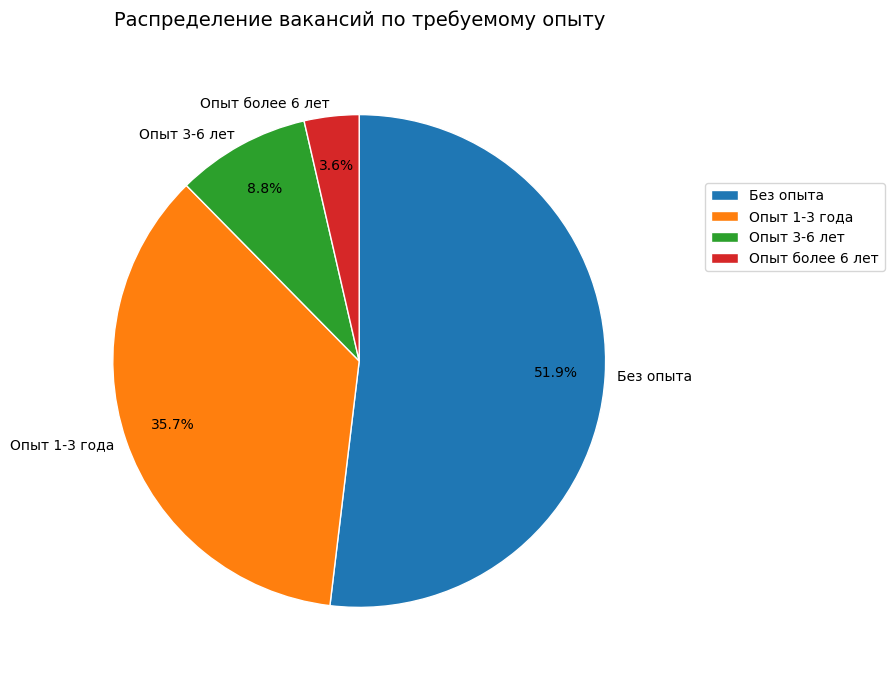

In [8]:
#Санкт-Петербург
# Открываем csv файл для работы над визуализацией
vacanciesplots = pd.read_csv('vacancies_spb.csv', sep=',', encoding='utf-8')

# Круговая диаграмма по требованиям работы
fig, ax = plt.subplots(figsize=(12, 8))

# Получаем распределение
requirements_counts = vacanciesplots['Опыт'].value_counts()

# Строим круговую диаграмму с настройками
requirements_counts.plot(kind='pie',
                    ax=ax,
                    autopct='%1.1f%%',    # Проценты
                    startangle=90,       # Начало отсчета углов
                    counterclock=False,   # Направление размещения
                    pctdistance=0.8,     # Радиус для процентов
                    labeldistance=1.05,   # Радиус для подписей
                    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Границы секторов
                    textprops={'fontsize': 10})  # Размер шрифта

# Настройки графика
ax.set_title("Распределение вакансий по требуемому опыту", fontsize=14, pad=20)
ax.set_ylabel('')

# Убираем лишние границы
plt.box(False)

# Добавляем легенду справа
plt.legend(labels=requirements_counts.index,
           bbox_to_anchor=(1.05, 0.8),
           loc='upper left')

plt.show()




**График 2**

Следующим графиком была выбрана гистограмма с группировкой, чтобы отразить взаимное распределение вакансий по категориям и требуемому опыту. Также этот график позволяет отразить распределение вакансий в целом, так как с помощью круговой диаграммы этого сделать бы не получилось: слишком много категорий, график получился бы трудночитаемым.

График по Санкт-Петербургу показал, что:
1. Больше всего вакансий по категориям “продажи” и “менеджмент”, меньше всего вакансий по категориям “автомобильная сфера”, “недвижимость”, “педагогика и преподавание”, “юриспруденция”.

2. Для большинства вакансий во всех категориях опыт работы не требуется, по этому параметру, выделяется категория “продажи”. Фактор “опыт 1-3 года” преобладает у категории “менеджмент”, которая в целом является одной из лидирующих по числу вакансий. Опыт от 3 до 6 лет требуется, в основном, у профессий, для которых требуется профессиональное образование: сфера IT, промышленность, финансовый сектор.

<Figure size 1400x800 with 0 Axes>

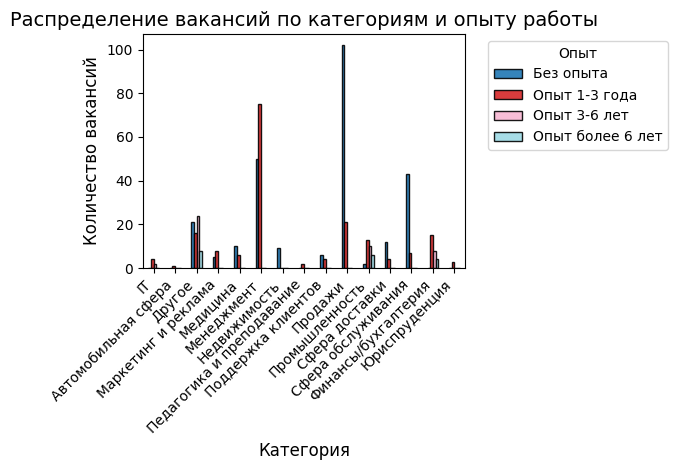

In [9]:

#Группированная столбчатая диаграмма для двух переменных
# Группировка данных
grouped = vacanciesplots.groupby(['Категория', 'Опыт']).size().unstack()

# Настройка графика
plt.figure(figsize=(14, 8))
grouped.plot(kind='bar', stacked=False, colormap='tab20', alpha=0.9, edgecolor='black')

# Подписи и заголовок
plt.title('Распределение вакансий по категориям и опыту работы', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Опыт', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**График 3**

Третьим графиком стал график рассеяния, который показывал соотношение между категориями вакансий и режимом работы, которые требуются чаще всего для каждой из них. Эта взаимосвязь является важным фактором при выборе работы для многих людей, поэтому мы решили, что ее необходимо показать.

В Санкт-Петербурге по этому графику можно сделать вывод, что преобладают вакансии, где работа “очная”, на месте работодателя. Интересным оказалось то, что даже в сфере IT все("все" на момент запуска кода нами, при парсинге в другой раз данные могут измениться) собранные вакансии предлагают работу на месте работодателя. В основном возможности для удаленной работы представлены в таких сферах как менеджмент, поддержка клиентов, маркетинг, а также в сфере “другое”.

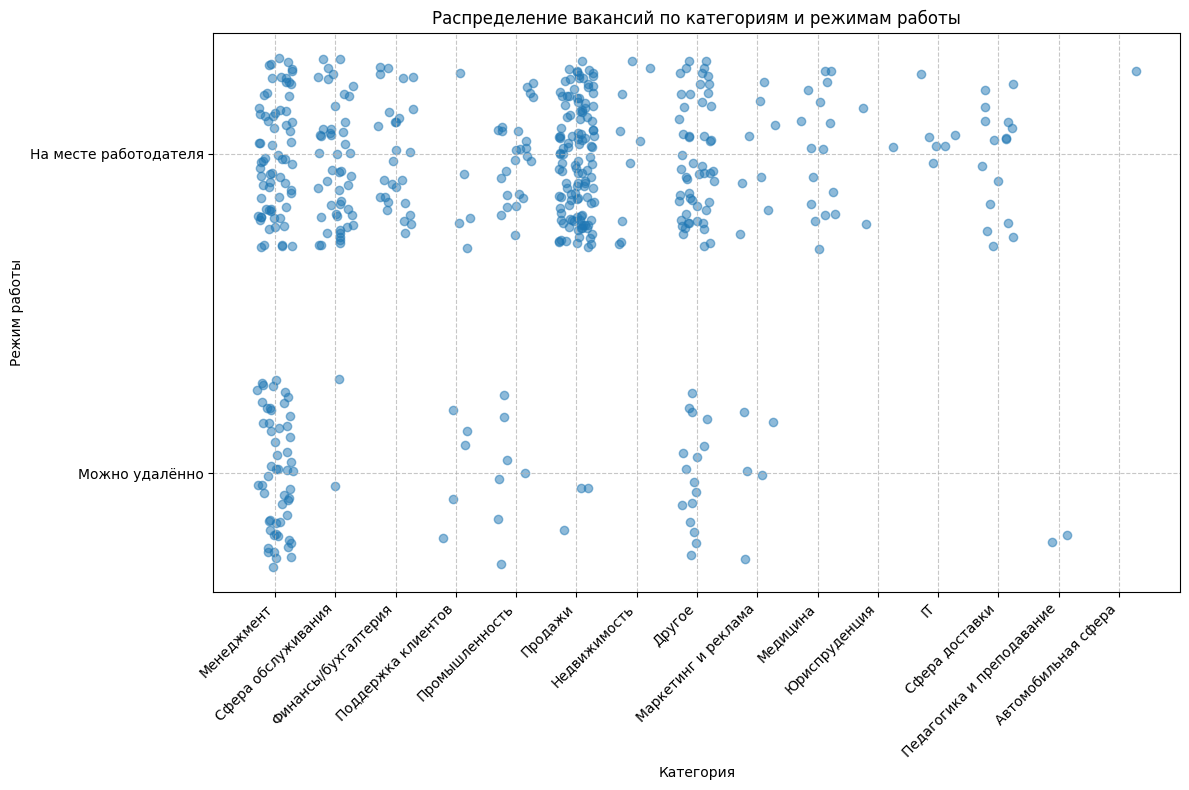

In [10]:
#Scatterplot (диаграмма рассеяния) для двух переменных

# Создание числовых кодов для категорий
cat_codes, cat_labels = pd.factorize(vacanciesplots['Категория'])
work_codes, work_labels = pd.factorize(vacanciesplots['Режим работы'])

# Добавление шума
np.random.seed(42)
jitter_cat = cat_codes + np.random.uniform(-0.3, 0.3, size=len(cat_codes))
jitter_work = work_codes + np.random.uniform(-0.3, 0.3, size=len(work_codes))

# Создание графика
plt.figure(figsize=(12, 8))
plt.scatter(jitter_cat, jitter_work, alpha=0.5)

# Настройка осей
plt.xticks(ticks=np.arange(len(cat_labels)), labels=cat_labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(work_labels)), labels=work_labels)

# Подписи и заголовок
plt.xlabel('Категория')
plt.ylabel('Режим работы')
plt.title('Распределение вакансий по категориям и режимам работы')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Челябинск**

**График 1**

Круговая диаграмма “Распределение вакансий по требуемому опыту” по Челябинску показала, что преобладают вакансии, не требующие опыта, и те, которые требуют опыта работы от 1 до 3 лет. Можно предположить, что это связано с распространенностью разнообразных категорий вакансий, как можно будет увидеть на следующем графике.




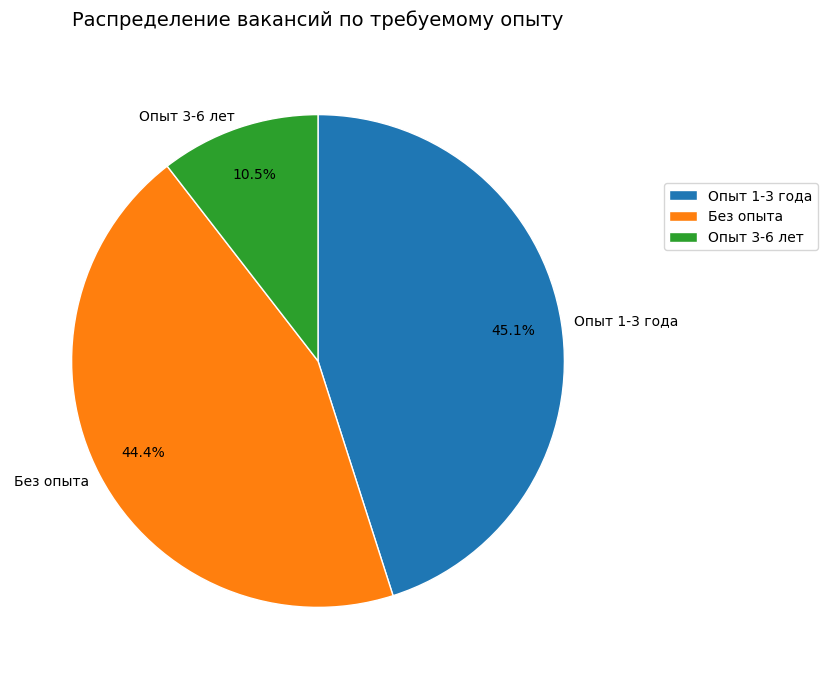

In [18]:
#Челябинск
# Открываем csv файл для работы над визуализацией
vacanciesplots = pd.read_csv('vacancies_chel.csv', sep=',', encoding='utf-8')

# Круговая диаграмма по требованиям работы
fig, ax = plt.subplots(figsize=(12, 8))

# Получаем распределение
requirements_counts = vacanciesplots['Опыт'].value_counts()

# Строим круговую диаграмму с настройками
requirements_counts.plot(kind='pie',
                    ax=ax,
                    autopct='%1.1f%%',    # Проценты
                    startangle=90,       # Начало отсчета углов
                    counterclock=False,   # Направление размещения
                    pctdistance=0.8,     # Радиус для процентов
                    labeldistance=1.05,   # Радиус для подписей
                    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Границы секторов
                    textprops={'fontsize': 10})  # Размер шрифта

# Настройки графика
ax.set_title("Распределение вакансий по требуемому опыту", fontsize=14, pad=20)
ax.set_ylabel('')

# Убираем лишние границы
plt.box(False)

# Добавляем легенду справа
plt.legend(labels=requirements_counts.index,
           bbox_to_anchor=(1.05, 0.8),
           loc='upper left')

plt.show()



**График 2**

График "гистограмма с группировкой" по Челябинску показал, что:
1. Преобладают вакансии по категории “другое” и по категориям “менеджмент”, "продажи" и “промышленность”. Меньше всего вакансий по категориям “маркетинг и реклама”, “педагогика и преподавание”, “сфера доставки” и “юриспруденция”. Так как выделяется категория “Другое”, можно сделать вывод о том, что в Челябинске, по сравнению с Санкт-Петербургом, больше разнообразных вакансий, которые трудно классифицировать. Возможно, это говорит о более широких возможностях на рынке труда для жителей этого города. Рост числа вакансий по категории “промышленность”, в сравнении с Санкт-Петербургом, говорит о специализации города.

2. В категории “другое”, которая выделяется среди остальных, в основном не требуется опыт работы или требуется минимальный (1-3 года), что, опять же, может говорить о больших возможностях на рынке труда для тех, кто ищет работу. В основном по категориям требуется минимальный опыт работы, особенно в сферах менеджмента, промышленности, сфере обслуживания и др. Кроме категории “другое” опыт от 3 до 6 лет чаще всего требуется для вакансий в сферах IT, менеджмента, промышленности и финансов.


<Figure size 1400x800 with 0 Axes>

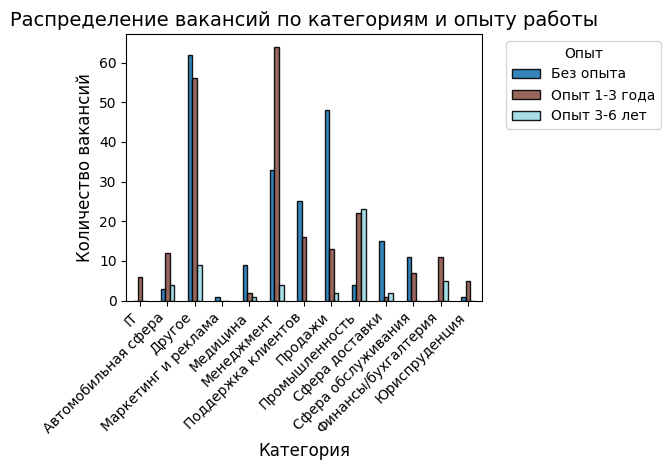

In [19]:
#Группированная столбчатая диаграмма для двух переменных
# Группировка данных
grouped = vacanciesplots.groupby(['Категория', 'Опыт']).size().unstack()

# Настройка графика
plt.figure(figsize=(14, 8))
grouped.plot(kind='bar', stacked=False, colormap='tab20', alpha=0.9, edgecolor='black')

# Подписи и заголовок
plt.title('Распределение вакансий по категориям и опыту работы', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Опыт', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**График 3**

В Челябинске по диаграмме рассеяния можно сделать выводы, что больше всего распространен очный формат работы. В отличие от Санкт-Петербурга, в этом городе есть вакансии с режимом работы “вахта”: чаще всего он наблюдается в сфере “другое” и в промышленности. Кроме сферы “другое” предоставлены возможности для удаленной работы по категориям “поддержка клиентов”, “продажи”, “менеджмент”, IT.

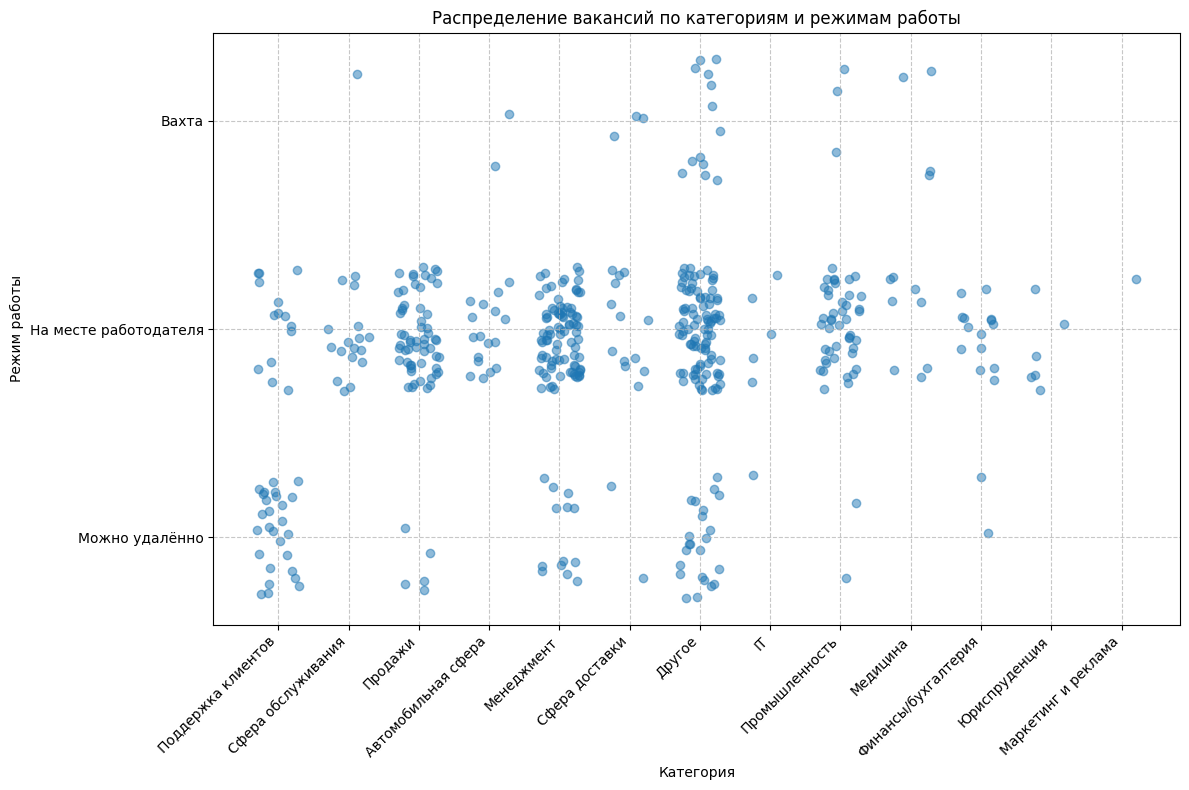

In [20]:
#Scatterplot (диаграмма рассеяния) для двух переменных

# Создание числовых кодов для категорий
cat_codes, cat_labels = pd.factorize(vacanciesplots['Категория'])
work_codes, work_labels = pd.factorize(vacanciesplots['Режим работы'])

# Добавление  шума
np.random.seed(42)
jitter_cat = cat_codes + np.random.uniform(-0.3, 0.3, size=len(cat_codes))
jitter_work = work_codes + np.random.uniform(-0.3, 0.3, size=len(work_codes))

# Создание графика
plt.figure(figsize=(12, 8))
plt.scatter(jitter_cat, jitter_work, alpha=0.5)

# Настройка осей
plt.xticks(ticks=np.arange(len(cat_labels)), labels=cat_labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(work_labels)), labels=work_labels)

# Подписи и заголовок
plt.xlabel('Категория')
plt.ylabel('Режим работы')
plt.title('Распределение вакансий по категориям и режимам работы')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Тольятти**

**График 1**

Круговая диаграмма “Распределение вакансий по требуемому опыту” по Тольятти показала, что преобладают вакансии, которые не требуют опыта работы. Здесь иногда прослеживается больше вакансий, где требуется опыт более 6 лет. Можно предположить, что это, как и в Челябинске, связано с распространенностью определенных категорий вакансий, как можно будет увидеть на следующем графике. Возможно, рынок труда Тольятти не заполнен, поэтому вакансии без опыта или с небольшим опытом работы требуются чаще других.



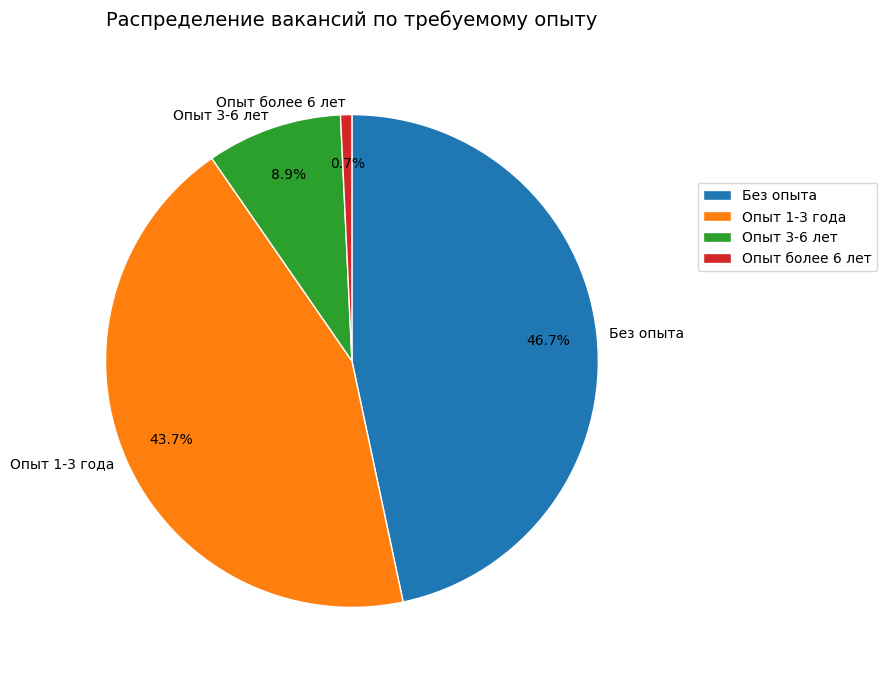

In [21]:
#Тольятти
# Открываем csv файл для работы над визуализацией
vacanciesplots = pd.read_csv('vacancies_tol.csv', sep=',', encoding='utf-8')

# Круговая диаграмма по требованиям работы
fig, ax = plt.subplots(figsize=(12, 8))

# Получаем распределение
requirements_counts = vacanciesplots['Опыт'].value_counts()

# Строим круговую диаграмму с настройками
requirements_counts.plot(kind='pie',
                    ax=ax,
                    autopct='%1.1f%%',    # Проценты
                    startangle=90,       # Начало отсчета углов
                    counterclock=False,   # Направление размещения
                    pctdistance=0.8,     # Радиус для процентов
                    labeldistance=1.05,   # Радиус для подписей
                    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},  # Границы секторов
                    textprops={'fontsize': 10})  # Размер шрифта

# Настройки графика
ax.set_title("Распределение вакансий по требуемому опыту", fontsize=14, pad=20)
ax.set_ylabel('')  # Убираем ненужную подпись оси Y

# Убираем лишние границы
plt.box(False)

# Добавляем легенду справа
plt.legend(labels=requirements_counts.index,
           bbox_to_anchor=(1.05, 0.8),
           loc='upper left')

plt.show()


**График 2**

График "гистограмма с группировкой" по Тольятти показал, что:

1. Больше всего вакансий по категориям “другое”, “менеджмент”, “продажи” и “промышленность”. Так же, как и в случае с Челябинском, это может говорить о том, что существует больше разнообразных вакансий, которые трудно классифицировать. Возможно, это говорит о более широких возможностях на рынке труда для жителей этого города. Так же, как и в Санкт-Петербурге, одной из лидирующих категорий вакансий являются “менеджмент” и “продажи”. Еще в  Тольятти лидирует промышленная отрасль, что, как и у Челябинска, говорит о промышленной специализации города.

2. Преобладают вакансии, которые не требуют опыта работы или требуют минимальный. Интересно, что у Тольятти, в отличие от Челябинска, в категории “другое” в основном требуются работники с минимальным опытом работы, что, возможно, несколько затруднит вход на рынок труда, хотя, это может зависеть и от рода вакансий, которые требуются. В сфере менеджмента в основном требуется минимальный опыт работы, а вот в сфере промышленности для большинства вакансий необходимо обладать опытом от 3 до 6 лет. Это не только говорит о Тольятти, как о промышленном городе, это свидетельствует о том, что требуются квалифицированные работники на предприятиях и заводах. Также “промышленность” это единственная(или практически единственная, что зависит от собранных данных) категория, где требуется опыт более 6 лет, возможно, по той же причине: требуются работники с широким набором умений и квалификаций.


<Figure size 1400x800 with 0 Axes>

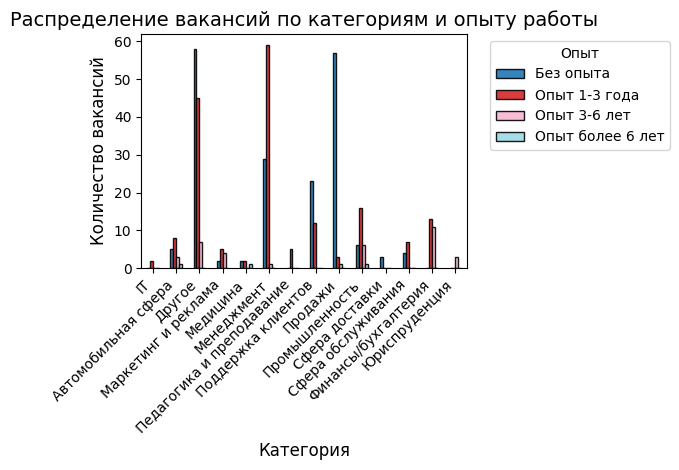

In [22]:
#Группированная столбчатая диаграмма для двух переменных
# Группировка данных
grouped = vacanciesplots.groupby(['Категория', 'Опыт']).size().unstack()

# Настройка графика
plt.figure(figsize=(14, 8))
grouped.plot(kind='bar', stacked=False, colormap='tab20', alpha=0.9, edgecolor='black')

# Подписи и заголовок
plt.title('Распределение вакансий по категориям и опыту работы', fontsize=14)
plt.xlabel('Категория', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Опыт', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**График 3**


В Тольятти по диаграмме рассеяния можно сделать вывод о том, что тоже преобладает очный формат работы. Как и в Челябинске, существуют вакансии с вахтовым режимом работы, в основном в сфере промышленности(кроме сферы “другое”). Удаленный формат работы предоставляется в категориях “менеджмент”, “поддержка клиентов” и “другое”.

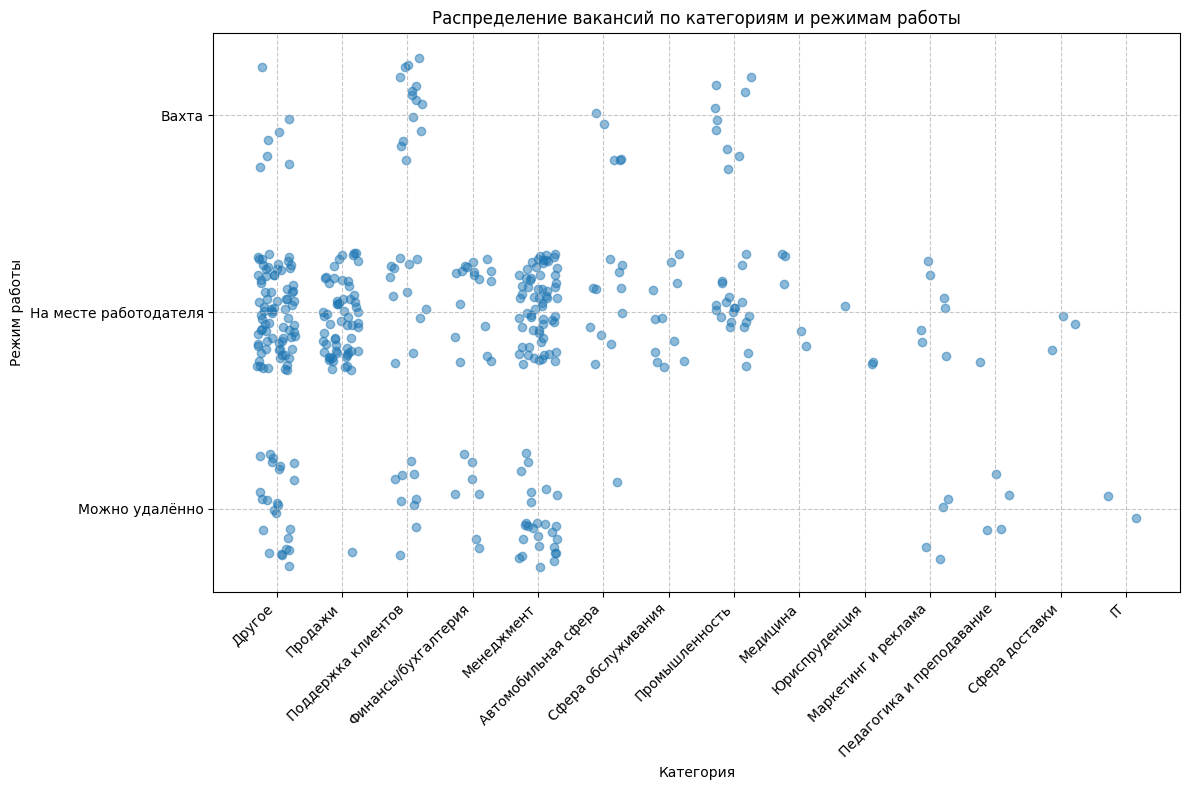

In [23]:
#Scatterplot (диаграмма рассеяния) для двух переменныхх

# Создание числовых кодов для категорий
cat_codes, cat_labels = pd.factorize(vacanciesplots['Категория'])
work_codes, work_labels = pd.factorize(vacanciesplots['Режим работы'])

# Добавление шума
np.random.seed(42)  # для воспроизводимости
jitter_cat = cat_codes + np.random.uniform(-0.3, 0.3, size=len(cat_codes))
jitter_work = work_codes + np.random.uniform(-0.3, 0.3, size=len(work_codes))

# Создание графика
plt.figure(figsize=(12, 8))
plt.scatter(jitter_cat, jitter_work, alpha=0.5)

# Настройка осей
plt.xticks(ticks=np.arange(len(cat_labels)), labels=cat_labels, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(work_labels)), labels=work_labels)

# Подписи и заголовок
plt.xlabel('Категория')
plt.ylabel('Режим работы')
plt.title('Распределение вакансий по категориям и режимам работы')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Сравнение средней заработной платы по городам**

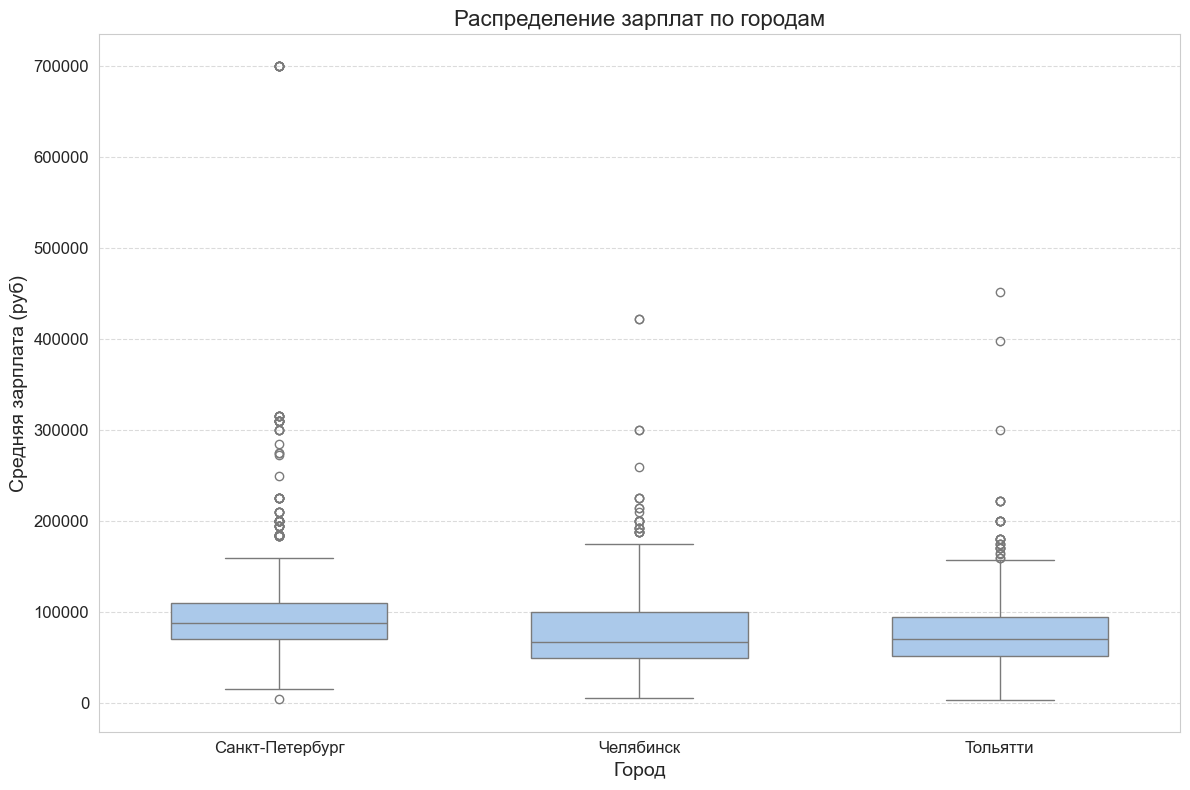


Описательная статистика по городам:
                 count           mean           std     min      25%      50%  \
city                                                                            
Санкт-Петербург  501.0  113254.324351  92096.507891  5000.0  70000.0  88500.0   
Тольятти         405.0   82280.923457  47348.358240  3500.0  51750.0  70000.0   
Челябинск        477.0   83705.587002  50169.851256  6000.0  50000.0  67500.0   

                      75%       max  
city                                 
Санкт-Петербург  110000.0  699999.5  
Тольятти          95000.0  452000.0  
Челябинск        100000.0  422200.0  


In [24]:
#1. Загрузка данных из JSON файлов
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
    return data

vacancies_spb = load_json('vacancies_spb.json')
vacancies_chel = load_json('vacancies_chel.json')
vacancies_tol = load_json('vacancies_tol.json')

#2. Добавление меток городов перед объединением
for vacancy in vacancies_spb:
    vacancy['city'] = 'Санкт-Петербург'
for vacancy in vacancies_chel:
    vacancy['city'] = 'Челябинск'
for vacancy in vacancies_tol:
    vacancy['city'] = 'Тольятти'

#3. Объединение данных в один список
all_vacancies = vacancies_spb + vacancies_chel + vacancies_tol

#4. Создание DataFrame
df = pd.DataFrame(all_vacancies)

#5. Очистка данных
df['salary'] = df['salary'].replace(["Не указана", "Не указан", ""], pd.NA)
df['experience'] = df['experience'].replace(["Не указана", "Не указан", ""], pd.NA)
df.dropna(subset=['salary', 'experience'], how='any', inplace=True)

#6. Функция для извлечения зарплат
def extract_salary_range(salary_str):
    if pd.isna(salary_str):
        return None, None

    salary_str = str(salary_str).lower().strip()
    if '$' in salary_str or '€' in salary_str:
        return None, None

    cleaned_str = re.sub(r'[^\d.,–\-—\s]', '', salary_str)
    cleaned_str = cleaned_str.replace(',', '.')
    cleaned_str = re.sub(r'[\s\xa0]', '', cleaned_str)

    match_range = re.search(r'(\d+(?:\.\d+)?)[–\-—](\d+(?:\.\d+)?)', cleaned_str)
    if match_range:
        try:
            min_salary = float(match_range.group(1))
            max_salary = float(match_range.group(2))
            return min_salary, max_salary
        except ValueError:
            pass

    match_single = re.search(r'(\d+(?:\.\d+)?)', cleaned_str)
    if match_single:
        try:
            salary = float(match_single.group(1))
            return salary, salary
        except ValueError:
            pass

    return None, None

#7. Извлечение зарплат
df[['min_salary', 'max_salary']] = df['salary'].apply(lambda x: pd.Series(extract_salary_range(x)))
df.dropna(subset=['min_salary', 'max_salary'], how='any', inplace=True)

#8. Фильтрация и обработка аномалий у зарплаты
df = df[(df['max_salary'] >= 1000) & (df['min_salary'] > 0)]
mask = df['max_salary'] < df['min_salary']
df.loc[mask, ['min_salary', 'max_salary']] = df.loc[mask, ['max_salary', 'min_salary']].values

#9. Создание столбца со средним значением зарплаты для анализа
df['avg_salary'] = (df['min_salary'] + df['max_salary']) / 2

#10. Построение диаграммы "ящик с усами"(boxplot)
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Создаем boxplot для средних зарплат по городам
boxplot = sns.boxplot(
    x='city',
    y='avg_salary',
    data=df,
    order=['Санкт-Петербург', 'Челябинск', 'Тольятти'],
    showfliers=True,  #Показываем  выбросы
    width=0.6
)

# Настройка оформления графика
plt.title('Распределение зарплат по городам', fontsize=16)
plt.xlabel('Город', fontsize=14)
plt.ylabel('Средняя зарплата (руб)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Добавляем горизонтальные линии для удобства
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Сохраняем график
plt.tight_layout()
plt.savefig('salary_by_city_boxplot.png', dpi=300)
plt.show()

#11. Дополнительная аналитика
print("\nОписательная статистика по городам:")
print(df.groupby('city')['avg_salary'].describe())

# Сохранение данных в csv формате
df.to_csv('vacancies_processed.csv', index=False, encoding='utf-8')

После парсинга и очистки данных размер выборки по каждому городу может быть разным, что важно учитывать при сравнении, однако различия не глобальные.

Санкт-Петербург — лидер по уровню зарплат. Средняя зарплата выше, чем в Тольятти и Челябинске. Максимальные зарплаты в Петербурге достигают самых высоких значений, что говорит о наличии высокооплачиваемых вакансий.

Челябинск и Тольятти имеют примерно одинаковую среднюю заработную плату, но значительно ниже, чем в Санкт-Петербурге, что говорит о том, что в регионах заработная плата ниже, чем больших городах. Челябинск — средний уровень заработной платы, но с высокими максимумами, чего нельзя сказать о Тольятти.

## Выводы

**Общие выводы по визуализации:**

1. Во всех трех городах преобладают вакансии в сфере менеджмента. Возможно, это говорит о дефиците работников в этой сфере во всех трех городах.

2. Распространенность остальных категорий вакансий связана со специализацией города(в Челябинске и Тольятти, например, больше распространена сфера промышленности). Сфера “другое” имеет большее число вакансий в региональных городах, из чего мы попробовали сделать вывод о том, что это может говорить о большем разнообразии вакансий, а, следовательно, о более вариативном рынке труда. При этом в основном для этих вакансий опыт не требуется, либо требуется минимальный, что дает больше возможностей найти работу тем, кто в этом нуждается.

3. В плане опыта работы порог вхождения на рынок труда не очень высокий, так как в большинстве вакансий опыт не требуется или требуется минимальный. Серьезный опыт работы 3-6 лет и более 6 лет требуется для профессий, где точно нужно профессиональное образование: промышленность, медицина, финансы, юриспруденция.

4. Графики по режиму работы показали, что сейчас большинство работодателей не предлагает возможности для удаленной работы. Оказалось интересным то, что сфера IT в большинстве городов тоже подразумевает работу в офисе, а не удаленно. В региональных городах также существуют вакансии с вахтовым режимом работы. Возможно, это связано с тем что у части работодателей место работы находится в отдалении от города, по которому производился поиск вакансий. Мы предположили, что распространенность вахтового режима работы может быть связана с дефицитом местных кадров вблизи производства, поэтому стало необходимым привлекать их из более крупных городов.

5. Что касается заработной платы, то чем крупнее город и чем больше он развит экономически, тем выше средние и максимальные зарплаты.

- Разрыв между городами по заработной плате: Санкт-Петербург заметно опережает остальных, Челябинск и Тольятти близки друг к другу, но в Челябинске больше высокооплачиваемых вакансий.

- Для соискателей: переезд в Санкт-Петербург может дать прирост зарплаты, но стоит учитывать стоимость жизни. В Тольятти и Челябинске меньше предложений с высокими зарплатами, но есть редкие исключения.

- Для работодателей: в Санкт-Петербурге конкуренция за кадры выше, нужно предлагать более высокие зарплаты. В Тольятти и Челябинске можно найти специалистов дешевле, но топ-кадры всё равно будут дорогими.


## Обсуждение

**Что мы хотели сделать в рамках исследования и что сделать удалось**

В нашем проекте мы хотели исследовать рынок труда в трёх городах: в городе, где мы сейчас живём и учимся, а также в тех городах, откуда мы родом. Мы хотели проанализировать, какие вакансии наиболее распространены и какие условия работы сейчас преобладают на рынке. Также было необходимо исследовать заработную плату в разных городах, так как заработок — практически самый важный фактор при поиске работы.

Нам удалось выявить самые популярные категории вакансий, а также преобладающие условия труда (режим работы) и требуемый опыт работы в трех городах. Мы проследили взаимосвязи между сферами вакансий и требуемым опытом работы, а также режимом работы. Кроме того, на удалось сравнить среднюю заработную плату по трем городам и сделать соответствующие выводы.


**Что сделать не удалось и почему**

При работе над проектом мы столкнулись с некоторыми трудностями и не все нам удалось решить.

Во-первых, из-за того, что сайт динамический, каждый раз парсится разное количество вакансий, а это нужно контролировать. В целом с сайта парсятся разные вакансии, так как он постоянно обновляется. Из-за этого сложно делать конкретные выводы, обозначать точные процентные соотношения, зависимости и т.д. Поэтому нам удалось сделать только обобщенные выводы, о чем мы писали в ходе работы, однако основные закономерности нам проследить удалось.

Также возникают сложности с подбором URL и селекторов при парсинге, эта часть нам далась сложнее всего, однако для анализируемых городов нам удалось решить эту проблему. Разное число вакансий также остается после очистки данных, что не может не вызывать погрешности при построении графиков, а это отражается на точности выводов по визуализации данных.

Во-вторых, сложности возникают при анализе заработной платы. На сайте она часто указана неодинаково: где-то в формате диапазона, где-то — в других денежных единицах. Это значительно затруднило процесс чистки данных по этому столбцу и приведение их к общему виду, чтобы сделать анализ удобным и возможным.


**Как наше исследование можно было бы улучшить**

Наше исследование можно было бы улучшить, например, настроив парсинг данных по каждой вакансии, чтобы была возможность извлекать все требования по каждой вакансии, переходить по каждой  и парсить соответствующую информацию: график работы, частота выплат и т.д. Так анализ получился бы более глубоким и информативным.


**Кому наше исследование может быть полезно**

Нам кажется, что наш проект может быть полезен для тех, кто хочет узнать больше о рынке труда в каком-либо городе (в нашем случае в Санкт-Петербурге, Челябинске или Тольятти). Несмотря на то, что исследование можно было сделать более глубоким, наших выводов может быть достаточно для предварительной оценки рынка вакансий или для получения общей информации о вакансиях города.
Наше исследование подойдет как для соискателей, так и для работодателей.

Соискатели, проанализировав рынок труда в разных городах, смогут решить для себя, стоит ли переезжать ради поиска хорошей работы в другой город, смогут выбрать для себя сферу работы согласно своему опыту и желаемому режиму работы, проследить заработные платы и сравнить их с другими городами.   

Работодатели могут проанализировать рынок труда в разных городах на наличие конкуренции за кадры в той или иной сфере и в том или ином городе и решить для себя, на какой рынок труда размещать вакансии.
